In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
data = gpd.read_file('/dashboard/type_fields.shp')

<AxesSubplot:>

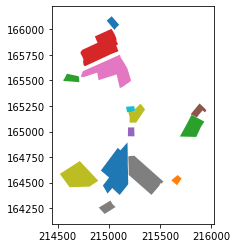

In [12]:
data.plot(column = 'crop_type')